# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [ ]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [ ]:
df_obesity = pd.read_csv("Datasets/obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [ ]:
df_obesity.info()

In [ ]:
df_obesity

In [ ]:
#df_obesity = df_obesity.set_index('Unnamed: 0')
del df_obesity['Unnamed: 0'] #Corrido pela aula

In [ ]:
df_obesity['Obesity (%)'].value_counts()

In [ ]:
# df_obesity['Obesity (%)'].apply(lambda x: x.split()[0]) Correção do Professor
df_obesity['Obesity (%)'].str.split(' ', n=1, expand=True)[0]

In [ ]:
# df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0]) Correção do Professor
df_obesity['Obesity'] = df_obesity['Obesity (%)'].str.split(' ', n=1, expand=True)[0]

In [ ]:
df_obesity['Obesity']

In [ ]:
#Dados "No" separado quando eu fiz o split no "No data"
#df_obesity.iloc[20800]

#Utilizando value_counts() para verificar os "No"
df_obesity['Obesity'].value_counts()

In [ ]:
#Usando o método replace() para substituir o "No" por valores nulo
df_obesity['Obesity'] = df_obesity['Obesity'].replace(to_replace='No', value=np.NaN)

# df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan Versão do Professor, funciona igual ao de cima

In [ ]:
df_obesity['Obesity'].value_counts()

In [ ]:
df_obesity['Obesity'].isnull().sum()

In [ ]:
#Apagando as linhas cujo os valores são nulos
df_obesity = df_obesity.dropna()

In [ ]:
df_obesity['Obesity'].isnull().sum()

In [ ]:
#usando a função de dataframe df.astype para definir a coluno como float
df_obesity['Obesity'] = df_obesity['Obesity'].astype(float)

# df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x : float(x))

In [ ]:
df_obesity.info()

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [ ]:
#Correção pelo Professor
df_obesity[df_obesity['Year'] == 2015].groupby('Sex').mean()

In [ ]:
perc_med_male_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Male")]['Obesity'].mean()

In [ ]:
perc_med_female_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Female")]['Obesity'].mean()

In [ ]:
perc_med_bothsexes_2015 = df_obesity[(df_obesity['Year']==2015) & (df_obesity['Sex'] == "Both sexes")]['Obesity'].mean()

In [ ]:
perc_med_male_2015

In [ ]:
perc_med_female_2015

In [ ]:
perc_med_bothsexes_2015

In [ ]:
df_obesity['Sex'].unique()

In [ ]:
df_obesity['Country'].nunique()

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [ ]:
df_obesity_inicio = df_obesity[(df_obesity['Year'] == df_obesity['Year'].min()) & (df_obesity['Sex'] == 'Both sexes')][['Obesity', 'Country']].set_index('Country')

In [ ]:
df_obesity_final = df_obesity[(df_obesity['Year'] == df_obesity['Year'].max()) & (df_obesity['Sex'] == 'Both sexes')][['Obesity', 'Country']].set_index('Country')

In [ ]:
df_obesity_evolucao = df_obesity_final - df_obesity_inicio

In [ ]:
df_obesity_evolucao['Obesity'].sort_values().head(5)

In [ ]:
df_obesity_evolucao['Obesity'].sort_values().tail(5)

In [ ]:
#df_obesity[df_obesity['Year'] == 2015]['Obesity'].max()

In [ ]:
#df_obesity[df_obesity['Year'] == 2015]['Obesity'].min()

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [ ]:
id_pais_maior_obesidade = df_obesity[(df_obesity['Year'] == 2014) & (df_obesity['Sex'] == 'Both sexes')]['Obesity'].idxmax()
df_obesity.loc[id_pais_maior_obesidade]['Country']

In [ ]:
#Versão do Professor
df_2015 = df_obesity[(df_obesity['Year'] == 2015)]
df_2015[(df_2015['Obesity'] == df_2015['Obesity'].max())]

In [ ]:
#Versão do Professor
df_2015[(df_2015['Obesity'] == df_2015['Obesity'].min())]

In [ ]:
id_pais_menor_obesidade = df_obesity[(df_obesity['Year'] == 2014) & (df_obesity['Sex'] == 'Both sexes')]['Obesity'].idxmin()
df_obesity.loc[id_pais_menor_obesidade]['Country']

- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [ ]:
df_brazil = df_obesity[df_obesity['Country'] == 'Brazil'].set_index('Year')

In [ ]:
df_brazil

In [ ]:
(df_brazil[df_brazil['Sex'] == 'Female']['Obesity'] - df_brazil[df_brazil['Sex'] == 'Male']['Obesity']).plot()

In [ ]:
female_obesity_years = df_obesity[(df_obesity['Sex'] == 'Female') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year')

In [ ]:
male_obesity_years = df_obesity[(df_obesity['Sex'] == 'Male') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year')

In [ ]:
female_obesity_years.mean()

In [ ]:
male_obesity_years.mean()

In [ ]:
(female_obesity_years - male_obesity_years).mean()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [ ]:
df_obesity[(df_obesity['Sex'] == 'Female') & (df_obesity['Country'] == 'Brazil')][['Obesity', 'Year']].set_index('Year').plot()

In [ ]:
df_obesity[(df_obesity['Sex'] == 'Male') & (df_obesity['Country'] == 'Brazil')][['Obesity','Year']].set_index('Year').plot()

In [ ]:
df_ambos_sexos = df_obesity[df_obesity['Sex'] == 'Both sexes']

In [ ]:
df_ambos_sexos.groupby('Year')['Obesity'].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [29]:
import pandas as pd
import numpy as np
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

#Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

#Correção do Professor
# df_gdp['Year'] = df_gdp['Year'].apply(lambda x : int(x.split('/')[-1]))
#Correção do Professor
# df_gdp['gdp'] = df_gdp[' GDP_pp '].apply(lambda x : float(x.strip().replace(',', '')))

df_gdp['Year'] = df_gdp['Year'].apply(lambda x : pd.to_datetime(x).year)
df_gdp['gdp'] = df_gdp[' GDP_pp '].str.strip().str.replace(',', '').astype(float)
del df_gdp[' GDP_pp ']

#del df_gdp[' GDP_pp ']
primeiro_valor_pais = df_gdp.groupby('Country')['Year'].min()

#Informe as regiões com maiores crescimentos de PIB per capita no século passado.

#Tinha entendido que era cresicmento médio no seculo passado por região
#df_gdp[(df_gdp['Year']  >= 1901) & (df_gdp['Year'] < 2000)][['Region','gdp']].groupby('Region').mean().sort_values('gdp', ascending=False)

df_gdp_inicio = df_gdp[df_gdp['Year'] == 1901]
df_gdp_fim = df_gdp[df_gdp['Year'] == 1996]

regioes_maior_crescimento_seculo = (((df_gdp_fim.groupby('Region')['gdp'].mean() / df_gdp_inicio.groupby('Region')['gdp'].mean()) -1) *100).sort_values(ascending=False)

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [48]:
import pandas as pd
import numpy as np
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

#Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

#Correção do Professor
# df_gdp['Year'] = df_gdp['Year'].apply(lambda x : int(x.split('/')[-1]))
#Correção do Professor
# df_gdp['gdp'] = df_gdp[' GDP_pp '].apply(lambda x : float(x.strip().replace(',', '')))

df_gdp['Year'] = df_gdp['Year'].apply(lambda x : pd.to_datetime(x).year)
df_gdp['gdp'] = df_gdp[' GDP_pp '].str.strip().str.replace(',', '').astype(float)
del df_gdp[' GDP_pp ']

#Versão do Código do Professor

import time
t1 = time.time()

arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_year, columns=["Year"])
df_all_years.index = df_all_years['Year']
df_years_off = ~df_all_years['Year'].isin(df_gdp['Year'])
df_years_off = df_all_years.loc[df_years_off].index

df_gdp = df_gdp.sort_values(["Country", "Year"])
df_gdp["delta_gdp"] = df_gdp["gdp"] - df_gdp["gdp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    
    if row["Year"] == 2011:
        continue
    
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off > row["Year"])]
    
    for new_year in year_to_add:
        add_row = row.copy()
        add_row["gdp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp"]
        add_row["Year"] = new_year
        add_row["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])
        
df_gdp = pd.concat([df_gdp, df_new_data]).sort_values(["Country", "Year"])
df_gdp.index = df_gdp['Year']

tempo_execucao_professor = time.time() - t1
print("Tempo de execução: {} segundos".format(tempo_execucao_professor))

Tempo de execução: 57.23182678222656 segundos


In [49]:
import pandas as pd
import numpy as np
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

#Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

#Correção do Professor
# df_gdp['Year'] = df_gdp['Year'].apply(lambda x : int(x.split('/')[-1]))
#Correção do Professor
# df_gdp['gdp'] = df_gdp[' GDP_pp '].apply(lambda x : float(x.strip().replace(',', '')))

df_gdp['Year'] = df_gdp['Year'].apply(lambda x : pd.to_datetime(x).year)
df_gdp['gdp'] = df_gdp[' GDP_pp '].str.strip().str.replace(',', '').astype(float)
del df_gdp[' GDP_pp ']

#Versão do meu código feito durante o exercício

import time
t1 = time.time()

lista = []
for j in range(len(df_gdp) - 1):

    if (df_gdp.iloc[j + 1]['Year'] - df_gdp.iloc[j]['Year'])== 5: # faz o for de baixo dentro desse if
    
        for i in range(4):
            registro = {}
            registro['Country'] = df_gdp.iloc[j]['Country']
            registro['Region'] = df_gdp.iloc[j]['Region']
            registro['Year'] = df_gdp.iloc[j]['Year'] + (i  + 1)
            registro['gdp'] = df_gdp.iloc[j]['gdp'] + (((df_gdp.iloc[j + 1]['gdp'] - df_gdp.iloc[j]['gdp']) / 5)* (i + 1))

            #Demora 5x mais o tempo de execução se utilizar df.append linha a linha
            #df_gdp = df_gdp.append(registro, ignore_index=True)

        lista.append(registro)
        
df_gdp = df_gdp.append(lista)

df_gdp = df_gdp.sort_values(['Country','Year'])

tempo_execucao_meu_codigo = time.time() - t1
print("Tempo de execução: {} segundos".format(tempo_execucao_meu_codigo))

Tempo de execução: 18.340229988098145 segundos


In [58]:
import pandas as pd
import numpy as np
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

#Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

#Correção do Professor
# df_gdp['Year'] = df_gdp['Year'].apply(lambda x : int(x.split('/')[-1]))
#Correção do Professor
# df_gdp['gdp'] = df_gdp[' GDP_pp '].apply(lambda x : float(x.strip().replace(',', '')))

df_gdp['Year'] = df_gdp['Year'].apply(lambda x : pd.to_datetime(x).year)
df_gdp['gdp'] = df_gdp[' GDP_pp '].str.strip().str.replace(',', '').astype(float)
del df_gdp[' GDP_pp ']

#Versão do meu código adaptado com as idéias do código do professor.

import time
t1 = time.time()

lista = []

for idx, row in df_gdp.iterrows(): #Novo Adaptado da Correção do profesor.

    if row['Year'] == 2011: #Novo Adaptado da Correção do profesor.
        continue #Novo Adaptado da Correção do profesor.

    for i in range((df_gdp.iloc[idx + 1]['Year'] - df_gdp.iloc[idx]['Year']) - 1): #Novo Adaptado da Correção do profesor.
        registro = {}
        registro['Country'] = row['Country'] #Novo Adaptado da Correção do profesor.
        registro['Region'] = row['Region'] #Novo Adaptado da Correção do profesor.
        registro['Year'] = row['Year'] + (i  + 1) #Novo Adaptado da Correção do profesor.
        registro['gdp'] = row['gdp'] + (((df_gdp.iloc[idx + 1]['gdp'] - row['gdp']) / 5) * (i + 1)) #Novo Adaptado da Correção do profesor.

        lista.append(registro)
        
df_gdp = df_gdp.append(lista)

df_gdp = df_gdp.sort_values(['Country','Year'])

tempo_execucao_meu_codigo_adaptado = time.time() - t1
print("Tempo de execução: {} segundos".format(tempo_execucao_meu_codigo_adaptado))

Tempo de execução: 5.871535539627075 segundos


In [59]:
print("Tempo de execução do programa do profesor foi de {:.2f} segundos".format(tempo_execucao_professor))
print("Tempo de execução do meu programa foi de {:.2f} segundos".format(tempo_execucao_meu_codigo))
print("Tempo de execução do meu programa adaptado do professor foi de {:.2f} segundos".format(tempo_execucao_meu_codigo_adaptado))
print()
print("Meu código é {} vezes mais rapido do que o do professor".format(tempo_execucao_professor/tempo_execucao_meu_codigo))
print("Meu código adaptado do professor é {} vezes mais rapido do que o do professor".format(tempo_execucao_professor/tempo_execucao_meu_codigo_adaptado))

Tempo de execução do programa do profesor foi de 57.23 segundos
Tempo de execução do meu programa foi de 18.34 segundos
Tempo de execução do meu programa adaptado do professor foi de 5.87 segundos

Meu código é 3.1205621096009724 vezes mais rapido do que o do professor
Meu código adaptado do professor é 9.74733549613524 vezes mais rapido do que o do professor


In [61]:
df_gdp.index = df_gdp['Year']

In [63]:
df_gdp

,Country,Region,Year,gdp
Year,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030
...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866


In [75]:
df_gdp.groupby(df_gdp.index)['gdp'].mean()

Year
1901     1481.057135
1902     1498.532187
1903     1516.007240
1904     1533.482292
1905     1550.957344
            ...     
2007    12542.010688
2008    12646.463094
2009    12750.915500
2010    12855.367906
2011    12959.820312
Name: gdp, Length: 111, dtype: float64

<AxesSubplot:xlabel='Year'>

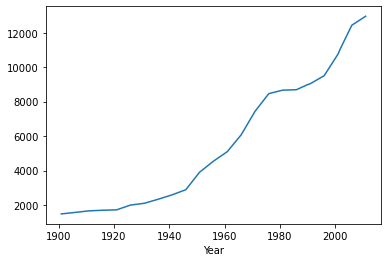

In [73]:
df_gdp.groupby(df_gdp.index)['gdp'].mean().plot()

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?